In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
house_transactions = pd.read_csv('house_transactions.csv', parse_dates=[2])
house_transactions.dropna(subset=['ticker'], inplace=True)
house_transactions = house_transactions[house_transactions['ticker'] != '--']
house_transactions = house_transactions[house_transactions['type'] != 'exchange']
house_transactions = house_transactions[house_transactions['transaction_date'].dt.year == 2020]
house_transactions.rename(columns={'ticker': 'ticker_original', 'type': 'type_detailed'}, inplace=True)
original_tickers = house_transactions['ticker_original']
house_transactions['ticker'] = [t.split(".")[0] if '.' in t else t for t in original_tickers]
house_transactions['share_class'] = [t.split(".")[1] if '.' in t else None for t in original_tickers]
house_transactions['type'] = house_transactions.apply(lambda row: 'Purchase' if row['type_detailed'] == 'purchase' else 'Sale', axis=1)
house_transactions['representative'] = house_transactions['representative'].str.slice(5)
house_transactions.sort_values(by=['ticker', 'transaction_date'], inplace=True)

house_transactions

,disclosure_year,disclosure_date,transaction_date,owner,ticker_original,asset_description,type_detailed,amount,representative,district,ptr_link,cap_gains_over_200_usd,ticker,share_class,type
4461,2020,05/05/2020,2020-04-09,NaN,A,"Agilent Technologies, Inc.",sale_partial,"$1,001 - $15,000",Peter Welch,VT00,https://disclosures-clerk.house.gov/public_dis...,True,A,None,Sale
4878,2020,12/29/2020,2020-11-17,joint,AA,American Airlines,sale_full,"$15,001 - $50,000",Kenny Marchant,TX24,https://disclosures-clerk.house.gov/public_dis...,False,AA,None,Sale
4487,2020,02/05/2020,2020-01-03,joint,AAGIY,"AIA Group, Ltd. Sponsored American Depository ...",purchase,"$15,001 - $50,000",Greg Gianforte,MT00,https://disclosures-clerk.house.gov/public_dis...,False,AAGIY,None,Purchase
5599,2020,02/14/2020,2020-01-13,joint,AAGIY,"AIA Group, Ltd. Sponsored American Depository ...",sale_full,"$15,001 - $50,000",Greg Gianforte,MT00,https://disclosures-clerk.house.gov/public_dis...,False,AAGIY,None,Sale
7419,2020,04/14/2020,2020-03-27,joint,AAGIY,"AIA Group, Ltd. Sponsored American Depository ...",purchase,"$50,001 - $100,000",Greg Gianforte,MT00,https://disclosures-clerk.house.gov/public_dis...,False,AAGIY,None,Purchase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,2020,04/09/2020,2020-03-27,NaN,ZTS,Zoetis Inc. Class A,purchase,"$1,001 - $15,000",John Curtis,UT03,https://disclosures-clerk.house.gov/public_dis...,False,ZTS,None,Purchase
1498,2020,08/03/2020,2020-07-21,self,ZTS,Zoetis Inc. Class A,sale_partial,"$1,001 - $15,000",Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False,ZTS,None,Sale
8344,2020,08/27/2020,2020-08-07,self,ZTS,Zoetis Inc. Class A,sale_full,"$1,001 - $15,000",Joe Courtney,CT02,https://disclosures-clerk.house.gov/public_dis...,False,ZTS,None,Sale
9034,2020,10/15/2020,2020-09-03,NaN,ZUO,"Zuora, Inc. Class A",purchase,"$15,001 - $50,000",Brian Mast,FL18,https://disclosures-clerk.house.gov/public_dis...,False,ZUO,None,Purchase


In [3]:
# f = open("house_tickers.txt", "w")
# f.write('\n'.join(house_transactions['ticker'].unique()))
# f.close()

In [4]:
house_stocks = pd.read_csv('house_stocks.csv', parse_dates=[1])
house_stocks['PRC'] = house_stocks['PRC'].abs()
house_stocks

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (3,6,13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PERMNO,date,SHRCD,SICCD,TICKER,COMNAM,SHRCLS,TSYMBOL,HSICCD,BIDLO,ASKHI,PRC,VOL,RET,OPENPRC,NUMTRD,RETX
0,10104,2019-01-02,11.0,7372,ORCL,ORACLE CORP,NaN,ORCL,7372.0,44.45000,45.34000,45.22000,14320441.0,0.00155,44.48000,NaN,0.00155
1,10104,2019-01-03,11.0,7372,ORCL,ORACLE CORP,NaN,ORCL,7372.0,44.41000,45.50000,44.78000,19868713.0,-0.00973,44.75000,NaN,-0.00973
2,10104,2019-01-04,11.0,7372,ORCL,ORACLE CORP,NaN,ORCL,7372.0,45.25000,46.95000,46.71000,20983953.0,0.0431,45.37000,NaN,0.0431
3,10104,2019-01-07,11.0,7372,ORCL,ORACLE CORP,NaN,ORCL,7372.0,46.47000,48.10500,47.45000,17967907.0,0.015842,46.93000,NaN,0.015842
4,10104,2019-01-08,11.0,7372,ORCL,ORACLE CORP,NaN,ORCL,7372.0,47.20000,48.36000,47.88000,16255688.0,0.009062,47.93000,NaN,0.009062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562915,93436,2020-12-24,11.0,9999,TSLA,TESLA INC,NaN,TSLA,9999.0,641.00000,666.09003,661.77002,22813214.0,0.024444,642.98999,465870.0,0.024444
562916,93436,2020-12-28,11.0,9999,TSLA,TESLA INC,NaN,TSLA,9999.0,660.79999,681.40002,663.69000,32232732.0,0.002901,674.51001,631681.0,0.002901
562917,93436,2020-12-29,11.0,9999,TSLA,TESLA INC,NaN,TSLA,9999.0,655.00000,669.90002,665.98999,22867542.0,0.003465,661.00000,466884.0,0.003465
562918,93436,2020-12-30,11.0,9999,TSLA,TESLA INC,NaN,TSLA,9999.0,668.36029,696.59998,694.78003,42766263.0,0.043229,672.00000,767565.0,0.043229


In [5]:
house_transactions = house_transactions[house_transactions['ticker'].isin(house_stocks['TICKER'].unique())]

In [6]:
# index = pd.read_csv('RUSSEL_3000_2020.csv', parse_dates=[0], index_col=0, thousands=r',')
index = pd.read_csv('sp500.csv', parse_dates=[0], index_col=0)

In [7]:
house = house_transactions.copy()
house.drop(columns=['ticker_original', 'ptr_link'], inplace=True)

In [8]:
amount_map = {
    '$1,001 -':1,
    '$1,001 - $15,000':1,
    '$15,001 - $50,000':2,
    '$50,001 - $100,000':3,
    '$100,001 - $250,000':4,
    '$250,001 - $500,000':5,
    '$500,001 - $1,000,000':6,
    '$1,000,001 - $5,000,000':7,
    '$5,000,001 - $25,000,000':8,
}
house['amount_discrete'] = house['amount'].apply(lambda a: amount_map[a])

In [9]:
market_cap = pd.read_csv('MarketCap_Dec31_2020.csv')[['ticker', 'Market Cap']].rename(columns = {'Market Cap':'market_cap'})
market_cap['market_cap'] = 1000 * market_cap['market_cap']
house = house.merge(market_cap, on='ticker')

In [22]:
times = {'1d':1, '5d':5, '1m':22, 'prev1d':-1, 'prev5d':-5, 'prev1m':-22}

daily_returns = pd.DataFrame(columns=list(range(-21,23))+['type', 'ticker', 'amount'])

prev_ticker = None
prev_stock_prices = None

for i, tr in house.iterrows():
    stock_prices = prev_stock_prices
    if tr['ticker'] != prev_ticker:
        stock_prices = house_stocks[house_stocks['TICKER'] == tr['ticker']]
        if tr['share_class']:
            stock_prices = stock_prices[stock_prices['SHRCLS'] == tr['share_class']]
        stock_prices['daily_return'] = stock_prices['PRC'].pct_change()
        prev_ticker = tr['ticker']
        prev_stock_prices = stock_prices
        
    stock_transaction = stock_prices[stock_prices['date'] == tr['transaction_date']]
    if len(stock_transaction) != 1:
        continue
    idx = stock_transaction.index[0]
    index_idx = index.index.get_loc(tr['transaction_date'])
    
    stock_daily_returns = stock_prices.loc[idx+times['prev1m']+1:idx+times['1m']]['daily_return']
    index_daily_returns = index.iloc[index_idx+times['prev1m']+1:index_idx+times['1m']+1]['sprtrn']
    if len(stock_daily_returns) == 44 and len(index_daily_returns) == 44:
        daily_returns.loc[i] = list(stock_daily_returns.to_numpy() - index_daily_returns.to_numpy()) + [tr['type'], tr['ticker'], tr['amount']]
    
    for time in times:
        type_multiplier = 1 if tr['type'] == 'Purchase' else -1
        prev_exponent = 1 if times[time] > 0 else -1
        try:
            house.loc[i, 'return_{}'.format(time)] = ((stock_prices.loc[idx+times[time]]['PRC'] / stock_prices.loc[idx]['PRC']) ** prev_exponent - 1) * type_multiplier
            house.loc[i, 'return_index_{}'.format(time)] = ((index.iloc[index_idx+times[time]]['spindx'] / index.iloc[index_idx]['spindx']) ** prev_exponent - 1) * type_multiplier
            house.loc[i, 'return_abnormal_{}'.format(time)] = house.loc[i, 'return_{}'.format(time)] - house.loc[i, 'return_index_{}'.format(time)]
        except:
            pass

<ipython-input-22-ed23181de6af>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_prices['daily_return'] = stock_prices['PRC'].pct_change()


In [23]:
daily_returns

,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,...,16,17,18,19,20,21,22,type,ticker,amount
0,-0.006954,0.016380,-0.001733,0.046575,0.038439,0.029543,-0.049866,0.054005,-0.017200,-0.036545,...,0.000466,0.015235,0.026620,-0.003415,-0.001458,0.019394,0.003071,Sale,A,"$1,001 - $15,000"
1,0.017122,0.008733,0.042821,0.020307,-0.017355,-0.016302,0.005334,-0.016132,0.019606,0.025463,...,0.058529,-0.047465,-0.042926,0.005921,-0.028386,0.022046,-0.004154,Sale,AA,"$15,001 - $50,000"
2,-0.061272,-0.031256,-0.032484,-0.067005,-0.056013,-0.025444,-0.004108,-0.100455,0.012690,-0.000423,...,0.018373,-0.026199,0.025250,-0.089294,-0.001408,-0.008064,-0.042842,Purchase,AAL,"$1,001 - $15,000"
3,-0.061272,-0.031256,-0.032484,-0.067005,-0.056013,-0.025444,-0.004108,-0.100455,0.012690,-0.000423,...,0.018373,-0.026199,0.025250,-0.089294,-0.001408,-0.008064,-0.042842,Purchase,AAL,"$1,001 - $15,000"
4,0.264221,0.094068,-0.044870,-0.069761,-0.161009,0.011115,-0.078910,-0.081763,-0.051463,-0.058616,...,-0.015948,0.060313,-0.012819,0.007208,0.009800,-0.021565,0.136165,Purchase,AAL,"$1,001 - $15,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,0.001323,0.006515,0.004483,0.013644,0.028004,0.002863,-0.003406,0.016086,0.004285,0.005653,...,-0.009342,0.023583,-0.001137,-0.007593,0.009559,-0.014029,-0.016709,Sale,ZTS,"$1,001 - $15,000"
5531,0.028004,0.002863,-0.003406,0.016086,0.004285,0.005653,-0.000931,0.022486,-0.026269,0.030408,...,0.009559,-0.014029,-0.016709,0.004442,-0.002721,-0.029446,-0.005852,Purchase,ZTS,"$1,001 - $15,000"
5532,0.005649,-0.009843,0.004237,-0.001732,-0.003439,0.004642,-0.019812,0.022929,-0.003927,-0.001115,...,0.001488,-0.001028,-0.011284,-0.000354,0.015166,-0.005523,-0.003411,Sale,ZTS,"$1,001 - $15,000"
5533,-0.002497,-0.014679,0.018189,0.001705,0.008867,0.003546,0.009184,0.000649,-0.008256,-0.005057,...,0.002820,0.004655,0.004875,-0.004371,-0.001691,0.004034,0.015032,Sale,ZTS,"$1,001 - $15,000"


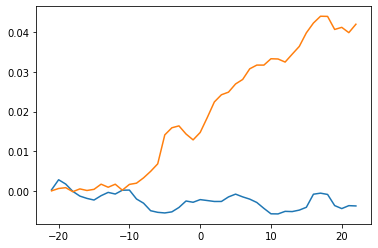

In [12]:
# def graph(tr_type):
#     daily = daily_returns[daily_returns['type'] == tr_type]
#     daily = daily.drop(columns=['type'])
#     cumulative = daily + 1
#     cumulative = cumulative.cumprod(axis=1)
#     return cumulative.mean() - 1

# plt.plot(graph('Purchase'))
# plt.plot(graph('Sale'))

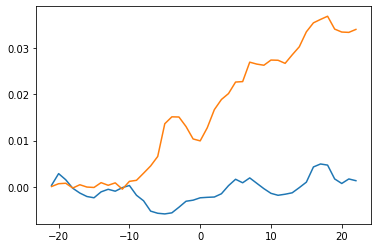

In [13]:
# def graph2(tr_type):
#     daily = daily_returns[daily_returns['type'] == tr_type]
#     daily = daily.drop(columns=['type'])
#     daily = daily.mean()
#     cumulative = (daily + 1).cumprod()
#     return cumulative - 1

# plt.plot(graph2('Purchase'))
# plt.plot(graph2('Sale'))

In [29]:
pd.options.plotting.backend = "plotly"

def cumulative_returns(tr_type):
    daily = daily_returns[daily_returns['type'] == tr_type].drop(columns=['type', 'ticker', 'amount'])
    cumulative = (daily+1).cumprod(axis=1)
    return cumulative.mean() - 1

df = pd.DataFrame({"Purchases": cumulative_returns('Purchase'), "Sales": cumulative_returns('Sale')})
px.line(df, labels={"index":"t", "value": "return"})

In [30]:
def cumulative_returns_avg_by_ticker(tr_type):
    daily = daily_returns[daily_returns['type'] == tr_type].drop(columns=['type', 'amount'])
    cumulative = daily.copy()
    cumulative.iloc[:,:-1] = (daily.iloc[:,:-1]+1).cumprod(axis=1)
    return cumulative.groupby('ticker').mean().mean() - 1

df = pd.DataFrame({"Purchases": cumulative_returns_avg_by_ticker('Purchase'), "Sales": cumulative_returns_avg_by_ticker('Sale')})
px.line(df, labels={"index":"t", "value": "return"})

In [31]:
amount_midpoint_map = {
    '$1,001 -':1000,
    '$1,001 - $15,000': 8000.5,
    '$15,001 - $50,000': 32500.5,
    '$50,001 - $100,000': 75000.5,
    '$100,001 - $250,000':125000.5,
    '$250,001 - $500,000':375000.5,
    '$500,001 - $1,000,000':750000.5,
    '$1,000,001 - $5,000,000':2500000.5,
    '$5,000,001 - $25,000,000':15000000.5,
}

def cumulative_returns_weight_by_amount(tr_type):
    daily = daily_returns[daily_returns['type'] == tr_type].drop(columns=['type', 'ticker'])
    weight = daily['amount'].map(lambda a: amount_midpoint_map[a])
    cumulative = (daily.iloc[:,:-1]+1).cumprod(axis=1)
    cumulative = cumulative.mul(weight, axis=0)
    return cumulative.sum() / weight.sum() - 1

df = pd.DataFrame({"Purchases": cumulative_returns_weight_by_amount('Purchase'), "Sales": cumulative_returns_weight_by_amount('Sale')})
px.line(df, labels={"index":"t", "value": "return"})

In [14]:
house

,disclosure_year,disclosure_date,transaction_date,owner,asset_description,type_detailed,amount,representative,district,cap_gains_over_200_usd,...,return_abnormal_1m,return_prev1d,return_index_prev1d,return_abnormal_prev1d,return_prev5d,return_index_prev5d,return_abnormal_prev5d,return_prev1m,return_index_prev1m,return_abnormal_prev1m
0,2020,05/05/2020,2020-04-09,NaN,"Agilent Technologies, Inc.",sale_partial,"$1,001 - $15,000",Peter Welch,VT00,True,...,0.009378,-0.021385,-0.014487,-0.006897,-0.083552,-0.104048,0.020496,-0.074338,0.032062,-0.106400
1,2020,12/29/2020,2020-11-17,joint,American Airlines,sale_full,"$15,001 - $50,000",Kenny Marchant,TX24,False,...,-0.177036,-0.034541,0.004792,-0.039333,-0.142589,-0.018051,-0.124538,-0.447702,-0.036087,-0.411615
2,2020,05/05/2020,2020-03-25,NaN,"American Airlines Group, Inc.",purchase,"$1,001 - $15,000",James R. Langevin,RI02,False,...,-0.511687,0.105603,0.011535,0.094068,0.321030,0.032301,0.288729,-0.395285,-0.232596,-0.162689
3,2020,08/18/2020,2020-03-25,NaN,"American Airlines Group, Inc.",purchase,"$1,001 - $15,000",James R. Langevin,RI02,False,...,-0.511687,0.105603,0.011535,0.094068,0.321030,0.032301,0.288729,-0.395285,-0.232596,-0.162689
4,2020,05/07/2020,2020-04-23,--,"American Airlines Group, Inc.",purchase,"$1,001 - $15,000",Adam Kinzinger,IL16,False,...,0.017500,-0.001947,-0.000539,-0.001408,-0.074074,-0.000625,-0.073449,0.000000,0.250469,-0.250469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,2020,04/09/2020,2020-03-27,NaN,Zoetis Inc. Class A,purchase,"$1,001 - $15,000",John Curtis,UT03,False,...,-0.033329,-0.052074,-0.033687,-0.018386,0.107291,0.102628,0.004663,-0.179067,-0.184483,0.005416
5532,2020,08/03/2020,2020-07-21,self,Zoetis Inc. Class A,sale_partial,"$1,001 - $15,000",Alan S. Lowenthal,CA47,False,...,-0.053943,0.006577,-0.001679,0.008256,-0.032835,-0.018696,-0.014139,-0.055386,-0.045568,-0.009818
5533,2020,08/27/2020,2020-08-07,self,Zoetis Inc. Class A,sale_full,"$1,001 - $15,000",Joe Courtney,CT02,False,...,0.014039,0.015186,-0.000633,0.015819,-0.047468,-0.024505,-0.022963,-0.144586,-0.057206,-0.087380
5534,2020,10/15/2020,2020-09-03,NaN,"Zuora, Inc. Class A",purchase,"$15,001 - $50,000",Brian Mast,FL18,False,...,-0.077040,-0.306122,-0.035126,-0.270997,-0.135593,-0.008463,-0.127130,-0.054760,0.044927,-0.099686


In [15]:
house_members = pd.read_excel('house_members.xlsx', index_col=0, parse_dates=[6])
house_members['age'] = 2020 - house_members['born'].dt.year
house_members['in_office'] = 2020 - house_members['assumed_office']
house_members

,name,name_committee,party,education,assumed_office,born,age,in_office
name_long,,,,,,,,
Don Young,Don Young,Don Young,Republican,"Yuba College; California State University, Chi...",1973,1933-06-09,87,47
Eddie Bernice Johnson,Eddie Bernice Johnson,Eddie Bernice Johnson,Democratic,"St Mary's College, Indiana; Texas Christian Un...",1993,1935-12-03,85,27
Grace Napolitano,Grace Napolitano,Grace Napolitano,Democratic,Cerritos College; Texas Southmost College,1999,1936-12-04,84,21
Bill Pascrell,Bill Pascrell,Bill Pascrell,Democratic,Fordham University; BA; MA,1997,1937-01-25,83,23
Harold Dallas Rogers,Hal Rogers,Hal Rogers,Republican,Western Kentucky University; BA; University of...,1981,1937-12-31,83,39
...,...,...,...,...,...,...,...,...
Mark Green,Mark E. Green,Mark E. Green,Republican,United States Military Academy (BS); Universit...,2019,1964-11-08,56,1
Harley E. Rouda,Harley Rouda,Harley Rouda,Democratic,University of Kentucky (BA); Ohio State Univer...,2019,1978-10-20,42,1
David P. Roe,Phil Roe,Phil Roe,Republican,Austin Peay State University (BS); University ...,2009,1945-07-21,75,11


In [16]:
for h in house['representative'].unique():
    if h not in house_members.index:
        print(h)

In [17]:
committees = pd.read_excel('house_committees.xlsx')
committees['Committee'] = committees['Committee'].apply(lambda s: s.replace(' ', '_').replace(',', '').replace("'", ''))
committees

,House Member,House Member Name,Committee,Committee #
0,"David Scott, Georgia, Chair",David Scott,Agriculture,117
1,"Jim Costa, California",Jim Costa,Agriculture,117
2,"Jim McGovern, Massachusetts",Jim McGovern,Agriculture,117
3,"Filemon Vela Jr., Texas",Filemon Vela Jr.,Agriculture,117
4,"Alma Adams, North Carolina",Alma Adams,Agriculture,117
...,...,...,...,...
865,NaN,Phil Roe,Education_and_Labor,116
866,NaN,Lacy Clay,Financial_Services,116
867,NaN,Lacy Clay,Oversight_and_Reform,116
868,NaN,Kenny Marchant,Ways_and_Means,116


In [18]:
for name_index, row in house_members.iterrows():
    if name_index in house['representative'].unique() and row["name_committee"] not in committees['House Member Name'].unique():
        print(row["name_committee"])

Nancy Pelosi


In [19]:
for com in committees['Committee'].unique():
    house_members[com] = 0

for i, row in house_members.iterrows():
    for com in committees[committees['House Member Name'] == row['name_committee']]['Committee']:
        house_members.loc[i, com] = 1

house_members

,name,name_committee,party,education,assumed_office,born,age,in_office,Agriculture,Appropriations,...,House_Administration,Judiciary,Natural_Resources,Oversight_and_Reform,Rules,Science_Space_and_Technology,Small_Business,Transportation_and_Infrastructure,Veterans_Affairs,Ways_and_Means
name_long,,,,,,,,,,,,,,,,,,,,,
Don Young,Don Young,Don Young,Republican,"Yuba College; California State University, Chi...",1973,1933-06-09,87,47,0,0,...,0,0,1,0,0,0,0,1,0,0
Eddie Bernice Johnson,Eddie Bernice Johnson,Eddie Bernice Johnson,Democratic,"St Mary's College, Indiana; Texas Christian Un...",1993,1935-12-03,85,27,0,0,...,0,0,0,0,0,1,0,1,0,0
Grace Napolitano,Grace Napolitano,Grace Napolitano,Democratic,Cerritos College; Texas Southmost College,1999,1936-12-04,84,21,0,0,...,0,0,1,0,0,0,0,1,0,0
Bill Pascrell,Bill Pascrell,Bill Pascrell,Democratic,Fordham University; BA; MA,1997,1937-01-25,83,23,0,0,...,0,0,0,0,0,0,0,0,0,1
Harold Dallas Rogers,Hal Rogers,Hal Rogers,Republican,Western Kentucky University; BA; University of...,1981,1937-12-31,83,39,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mark Green,Mark E. Green,Mark E. Green,Republican,United States Military Academy (BS); Universit...,2019,1964-11-08,56,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Harley E. Rouda,Harley Rouda,Harley Rouda,Democratic,University of Kentucky (BA); Ohio State Univer...,2019,1978-10-20,42,1,0,0,...,0,0,0,1,0,0,0,1,0,0
David P. Roe,Phil Roe,Phil Roe,Republican,Austin Peay State University (BS); University ...,2009,1945-07-21,75,11,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
house_returns = house.join(house_members, on='representative')
house_returns

,disclosure_year,disclosure_date,transaction_date,owner,asset_description,type_detailed,amount,representative,district,cap_gains_over_200_usd,...,House_Administration,Judiciary,Natural_Resources,Oversight_and_Reform,Rules,Science_Space_and_Technology,Small_Business,Transportation_and_Infrastructure,Veterans_Affairs,Ways_and_Means
0,2020,05/05/2020,2020-04-09,NaN,"Agilent Technologies, Inc.",sale_partial,"$1,001 - $15,000",Peter Welch,VT00,True,...,0,0,0,1,0,0,0,0,0,0
1,2020,12/29/2020,2020-11-17,joint,American Airlines,sale_full,"$15,001 - $50,000",Kenny Marchant,TX24,False,...,0,0,0,0,0,0,0,0,0,1
2,2020,05/05/2020,2020-03-25,NaN,"American Airlines Group, Inc.",purchase,"$1,001 - $15,000",James R. Langevin,RI02,False,...,0,0,0,0,0,0,0,0,0,0
3,2020,08/18/2020,2020-03-25,NaN,"American Airlines Group, Inc.",purchase,"$1,001 - $15,000",James R. Langevin,RI02,False,...,0,0,0,0,0,0,0,0,0,0
4,2020,05/07/2020,2020-04-23,--,"American Airlines Group, Inc.",purchase,"$1,001 - $15,000",Adam Kinzinger,IL16,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,2020,04/09/2020,2020-03-27,NaN,Zoetis Inc. Class A,purchase,"$1,001 - $15,000",John Curtis,UT03,False,...,0,0,0,0,0,0,0,0,0,0
5532,2020,08/03/2020,2020-07-21,self,Zoetis Inc. Class A,sale_partial,"$1,001 - $15,000",Alan S. Lowenthal,CA47,False,...,0,0,1,0,0,0,0,1,0,0
5533,2020,08/27/2020,2020-08-07,self,Zoetis Inc. Class A,sale_full,"$1,001 - $15,000",Joe Courtney,CT02,False,...,0,0,0,0,0,0,0,0,0,0
5534,2020,10/15/2020,2020-09-03,NaN,"Zuora, Inc. Class A",purchase,"$15,001 - $50,000",Brian Mast,FL18,False,...,0,0,0,0,0,0,0,1,0,0


In [21]:
house_returns.to_csv(path_or_buf='house_returns.csv')